## **YAP 101 Homework-4**  
Due Date: 23 February 2020 23:59

Send your files to m.torusdag@etu.edu.tr

The subject of your email should be "YAP101 HW4"

In [2]:
# Run this cell first
from datascience import * 
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

The parliaments represent citizens. As each person should have equal rights, their representation in a parliament should be also same. This suggests that the number of representatives from each state/city should reflect the population of them. However, this might not be the case for some reason. us_representative_data.csv file contains the population of each state in US and the number of representatives for each. We will investigate whether the ditribution of the number of representatitives is aligned with the population of each state. 

**Question 1 (10 Points)**. Visualize the population and the number of representatives of each state to observe whether the distribution of representatives is fair

In [3]:
data=Table.read_table('us_representative_data.csv')# write your answer here
data.show(5)
data.column('Number of Representatives').sum()

# Piazzaya us_representative_data.csv dosyasında veriler String olarak yüklenmiş. Veri tipi düzenlendikten sonra ödeve yüklenmiştir. 

Unnamed: 0,State,Number of Representatives,Population
0,Alabama,7,4908621
1,Alaska,1,734002
2,Arizona,9,7378494
3,Arkansas,4,3038999
4,California,53,39937489


435

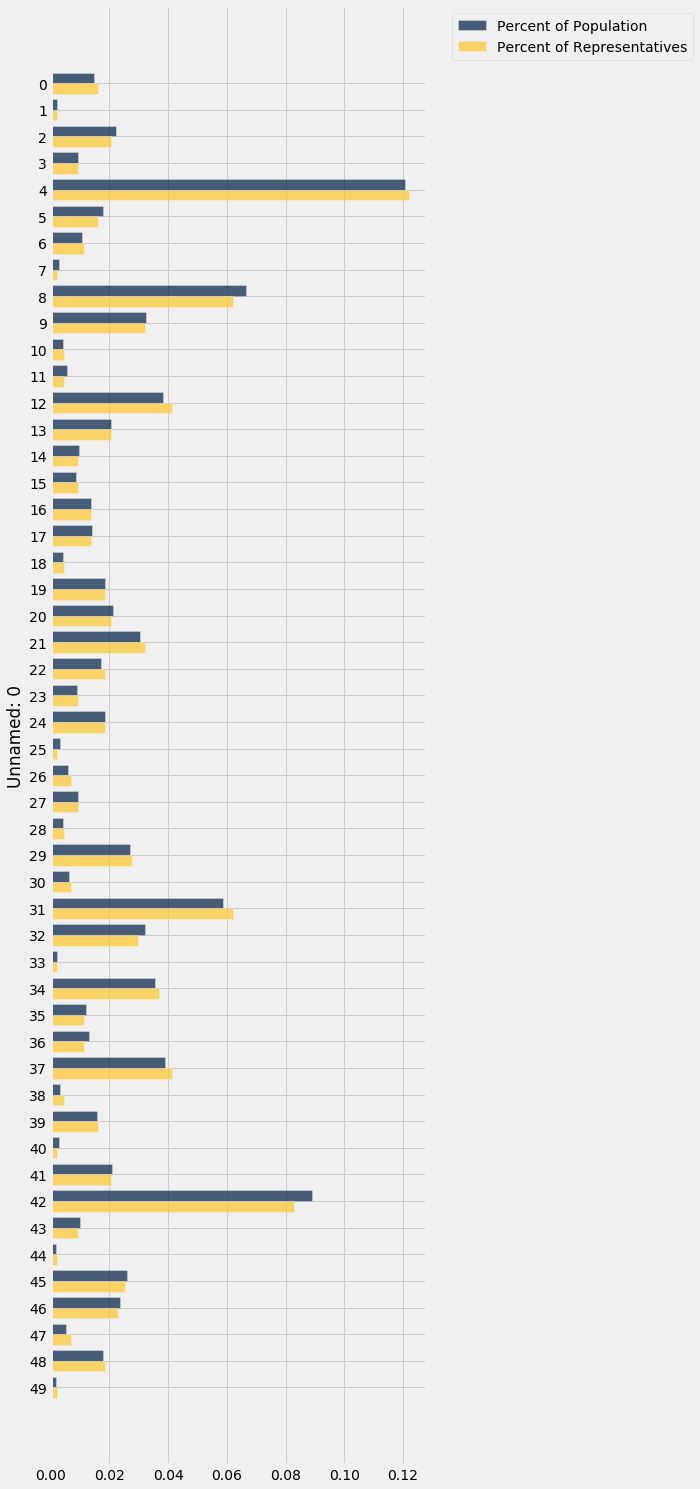

In [5]:
fact=data.select('Unnamed: 0','Number of Representatives','Population').with_columns('Percent of Population',data.column('Population')/data.column('Population').sum()).with_columns('Percent of Representatives',data.column('Number of Representatives')/data.column('Number of Representatives').sum())
fact.select('Unnamed: 0','Percent of Population','Percent of Representatives').barh('Unnamed: 0')


**Question 2 (10 Points)** What is the null hypothesis and alternative hypothesis regarding this issue?

The Null Hypothesis: the distribution of representatives is fair
Alternative Hypothesis : the distribution of representatives is not fair

**Question 3 (10 Points)** What is the your test statistic for your hypothesis?

Sum of absolute differences between the ratio of populations and the ratio of number of representatives. 


**Question 4 (10 Points)** What is the observed test statistic?

In [6]:
fact=fact.with_column('difference',abs(fact.column('Percent of Population')-fact.column('Percent of Representatives')))
test_st=fact.column('difference').sum()/2
test_st

0.025563100898494343

**Question 5(40 Points)**. What is the p-value? Do your simulations based on 5000 trials.

In [7]:
def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2

def table_tvd(table, label, other):
    return total_variation_distance(table.column(label),table.column(other))


In [8]:
parl_size = 435
repetitions = 5000
tvds = make_array()
for i in np.arange(repetitions):
    new_sample = proportions_from_distribution(fact, 'Percent of Representatives',parl_size)
    tvds = np.append(tvds, table_tvd(new_sample, 'Percent of Representatives','Random Sample'))

results = Table().with_column('TVD', tvds)
results

TVD
0.117241
0.121839
0.11954
0.144828
0.101149
0.105747
0.124138
0.11954
0.112644
0.135632


In [9]:
p_value =np.count_nonzero(tvds<=test_st)/435
p_value

0.0

**Question 6 (10 Points)** Visualize the distribution as we did in the lecture.

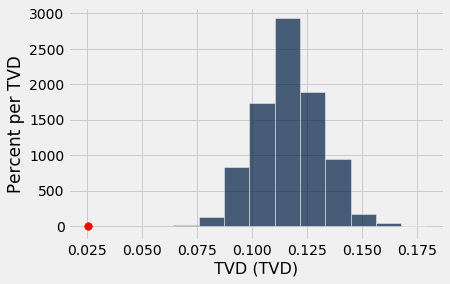

In [10]:
results.hist(unit='TVD')
plots.scatter(test_st,0,color='red',s=60)

**Question 7(10 Points)**. Which hypothesis should we accept?

The probability of being total variance distance is lower than observed value and 0.05, therefore alternative hypothesis should be accepted.